## LBVAR Symmetry

Symmetry LBVAR 모형에 대한 자세한 설명은 `manual/LBVAR Symmetry.md` 참고.

### 데이터 불러오기: 한국 거시경제변수 데이터, 변수 항목에 관한 자세한 내용은 아래 `df.info()` 결과를 참고.

In [1]:
import pandas as pd

In [2]:
# # large 데이터 로드
df = pd.read_excel("../data/Differed_Data_Selected.xlsx", index_col=0)

# 일부 컬럼만 사용 (138개 중)
col_limit = 10
df = df.iloc[:, :col_limit]

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2000-03-01 to 2023-12-01
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nominal_GDP          96 non-null     float64
 1   Total_Save           96 non-null     float64
 2   Household_Spending   96 non-null     float64
 3   Government_Spending  96 non-null     float64
 4   Foreign_Store        96 non-null     float64
 5   GDP_Deflator         96 non-null     float64
 6   Dollor_Won           96 non-null     float64
 7   Call                 96 non-null     float64
 8   Treasury_Bond        96 non-null     float64
 9   PPI                  96 non-null     float64
dtypes: float64(10)
memory usage: 8.2 KB


,Nominal_GDP,Total_Save,Household_Spending,Government_Spending,Foreign_Store,GDP_Deflator,Dollor_Won,Call,Treasury_Bond,PPI
Time,,,,,,,,,,
2000-03-01,15.364291,14.268692,15.159773,13.792548,59.403704,4.271157,7.007678,4.981847,8.939529,4.331653
2000-06-01,15.379320,14.304766,15.162181,13.823710,62.638977,4.271062,7.010601,5.036268,8.740849,4.326303
2000-09-01,15.402900,14.328262,15.162124,13.911984,63.234487,4.279456,7.033930,5.127937,8.204702,4.331350
2000-12-01,15.390514,14.292919,15.149745,13.830700,66.431507,4.291200,7.066415,5.356287,7.313966,4.336247
2001-03-01,15.405731,14.300737,15.171157,13.872958,69.774888,4.303751,7.131962,5.167332,5.635832,4.331585


`bok_da` 시계열분 석패키지 `ts`의 `lbvar` 모듈에서 `LBVAR_Symmetry` 클래스를 불러온 후, `model` 객체를 생성한다.

In [3]:
from bok_da.ts.lbvar import LBVAR_Symmetry

model = LBVAR_Symmetry(p=4, ndraws=10000, verbose=True, hyperparameter_opt=2, optimization_method=0)

> Initializing Model...
  - Trend: 1
  - p(lag): 4
  - Number of Draws: 10000
  - Hyperparameter Optimization: 2
  - Optimization Method: 0
  - Verbose: True


`model`의 `fit()` 메서드를 이용해 `LBVAR_Symmetry` 모형을 추정할 수 있다.

In [4]:
model.fit(df)

> Optimizing objective function using scipy Optimization Method
> Optimized Hyperparameters are [6.0000e-02 1.3070e+00 8.0879e+01 2.5000e-02 2.0580e+00]
> Hyperparameter Optimization Start


Hyperparameter MCMC: 100%|██████████| 10000/10000 [00:16<00:00, 612.15it/s]


> Hyperparameter Optimization Clear
> Opt Hyperparameters are [6.1000e-02 1.3100e+00 8.0522e+01 9.5300e-01 4.4860e+00]
> Prior Making (Symmetric)
> Posterior Draw (Symmetric)


Posterior Draw: 100%|██████████| 10000/10000 [00:02<00:00, 4125.89it/s]


`Draw.variable_summary()` 메서드를 이용해 모형파라미터에 대한 요약정보를 확인할 수 있다.

In [5]:
model.Draw.variable_summary()

added | variable  | type    |   size(KB) | info
----------------------------------------------------
    1 | Sigma     | ndarray |   7812.641 | shape=(10, 10, 10000)
    2 | Bet_Prime | ndarray |  32031.391 | shape=(41, 10, 10000)
    3 | Bet       | ndarray |  32031.391 | shape=(10, 41, 10000)
    4 | U_B       | ndarray |  71875.141 | shape=(92, 10, 10000)


`model`의 `forecast` 메서드를 이용해 변수별 예측을 수행한다. 예측기간은 `forecast_period=` 인자를 통해 설정할 수 있다.

In [6]:
forecast_results = model.forecast(forecast_period=4)

# 예측 결과 확인
print(forecast_results.Mean)

> Forecast Start


100%|██████████| 10000/10000 [00:00<00:00, 17668.11it/s]

[[ 16.08565599  15.01498216  15.77400476  14.85252086  97.32182022
    4.73859242   7.23675695   3.23842705   3.21216689   4.77283576]
 [ 16.08198788  15.01259562  15.76541072  14.87703254  98.10138379
    4.74786981   7.28565832   2.77091229   2.93445192   4.77514793]
 [ 16.07845358  15.0106727   15.75688923  14.90300656  99.4682894
    4.7568384    7.33829986   2.26420742   2.57554663   4.77526712]
 [ 16.07475298  15.00783558  15.75075814  14.91982036 101.0502865
    4.76468384   7.37943594   1.71776904   2.27366639   4.77255385]]


In [3]:
`model`의 `print_forecast` 메서드를 사용하여 예측결과를 출력할 수 있다.

SyntaxError: invalid syntax (4137858148.py, line 1)

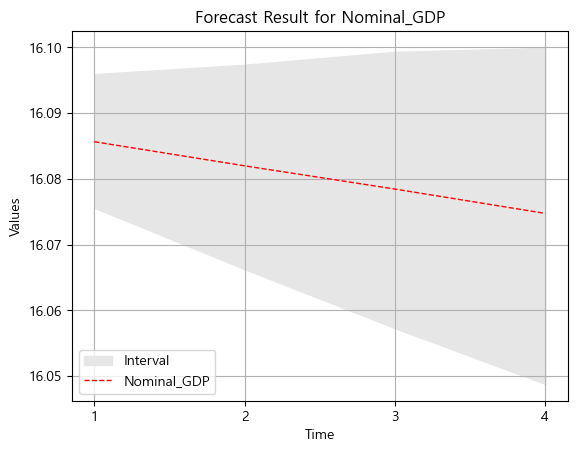

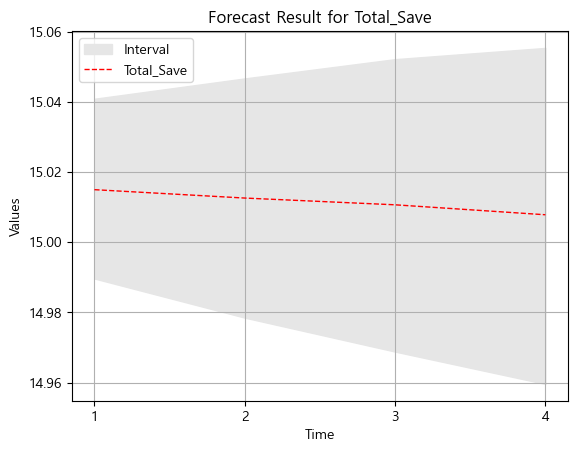

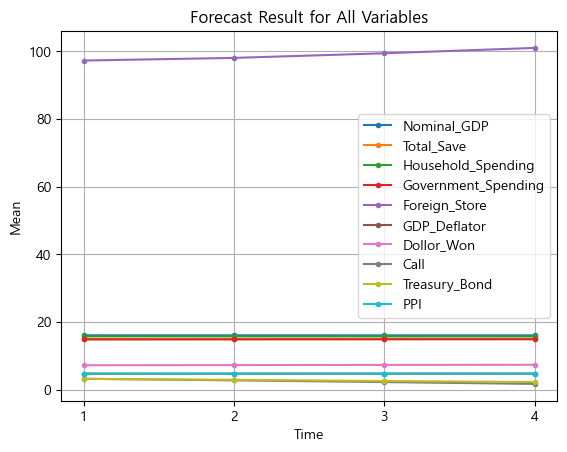

In [7]:
model.print_forecast(plot_index=[1, 2], column_names=df.columns)

`models`의 `recursive_irf()`함수를 이용해 충격반응함수를 구한다.

In [8]:
model.recursive_irf()

> Impulse Response Calculating...


2/2: 100%|██████████| 10/10 [00:02<00:00,  3.96it/s]


> Forecast error variance decomposition Calculating...


4/4: 100%|██████████| 10000/10000 [00:00<00:00, 28280.73it/s]


> Historical Decomposition Calculating...


3/3: 100%|██████████| 10000/10000 [03:43<00:00, 44.68it/s]


> Done.


`plot_irf_shock_series()` 메서드를 사용해 변수별 충격 시계열을 시각화한다.

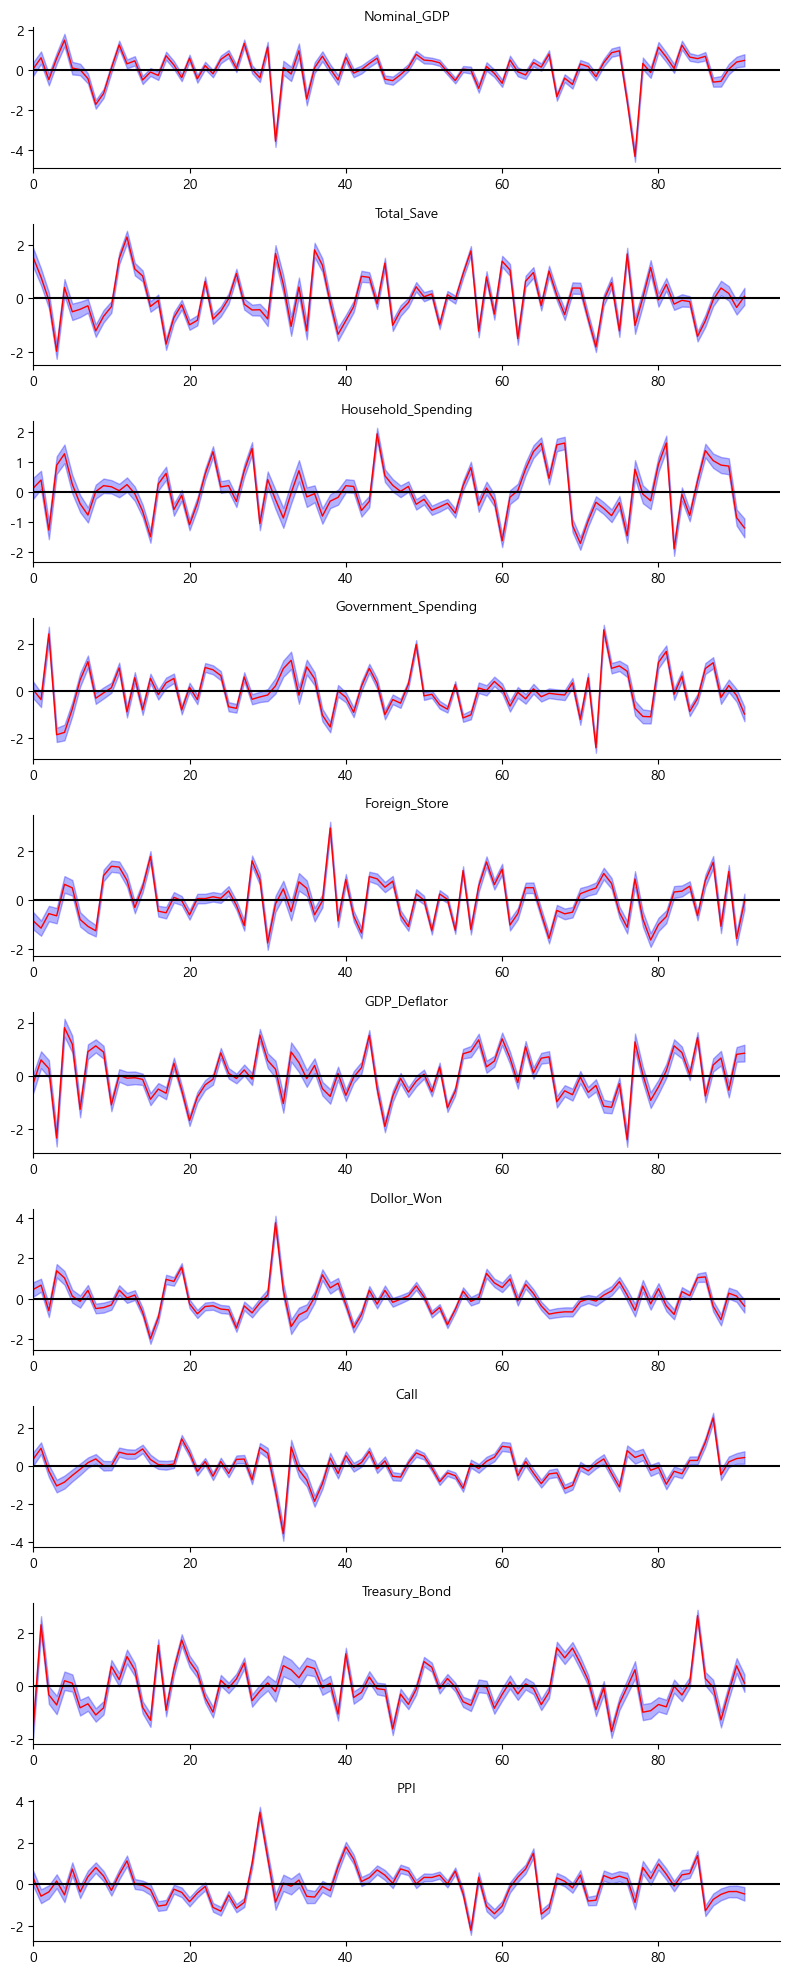

In [9]:
model.plot_irf_shock_series(df.columns)

`plot_irf_impulse_response()` 함수를 이용해 충격반응함수 분석 결과를 출력한다.

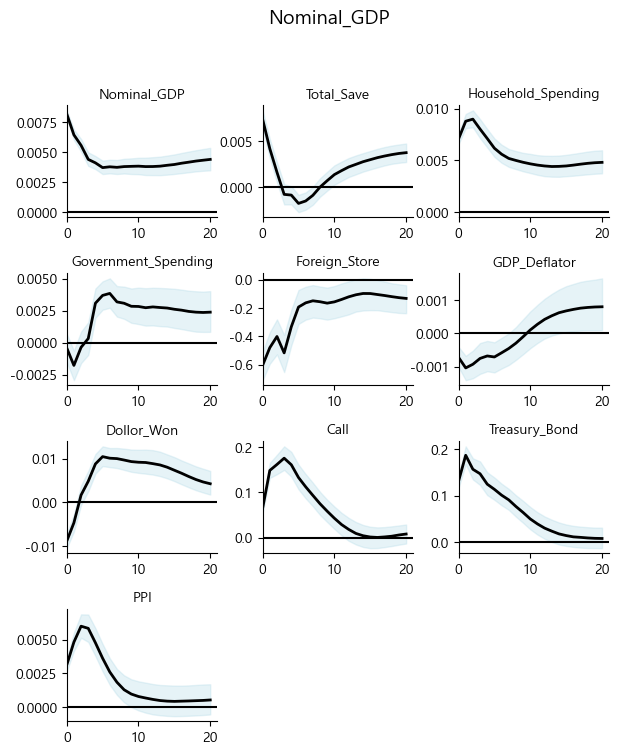

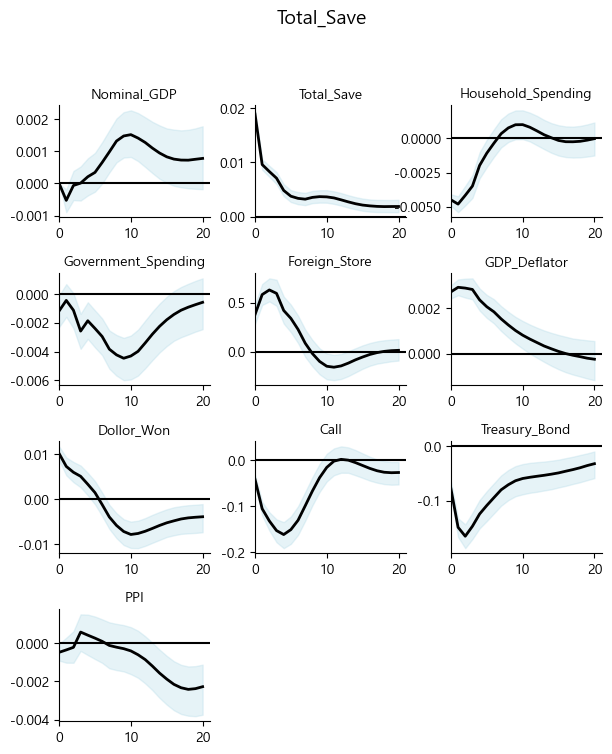

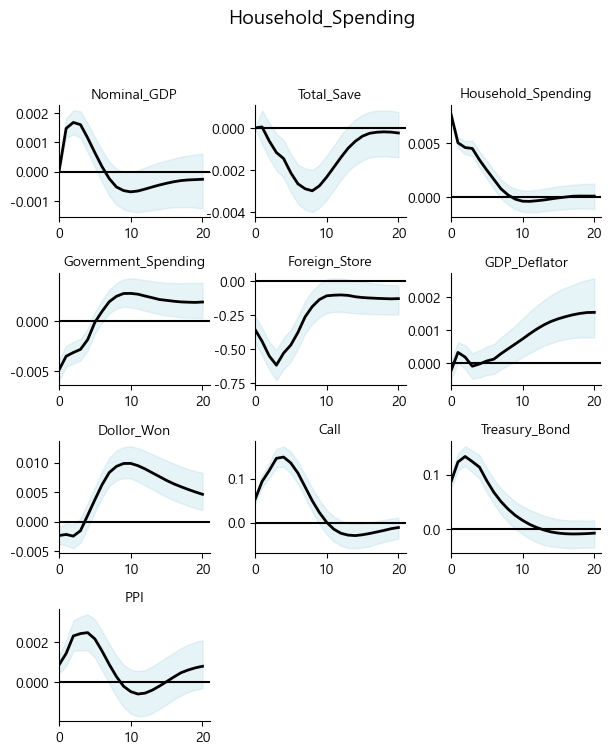

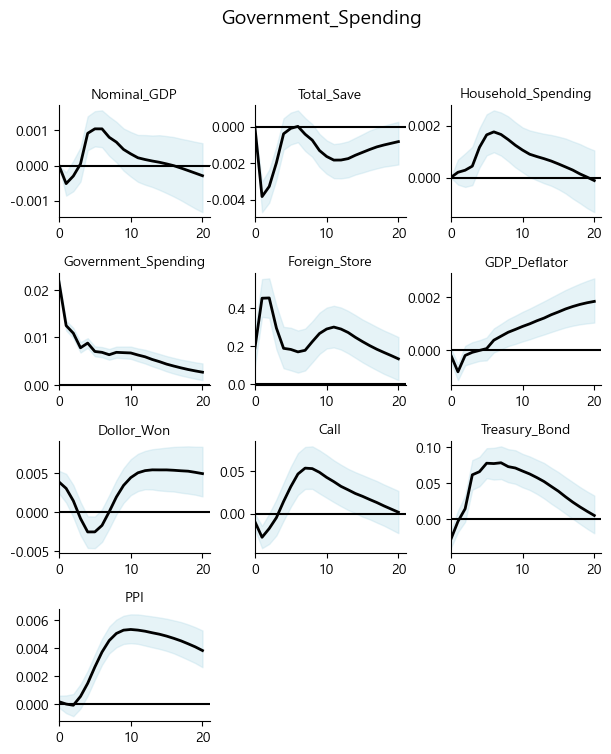

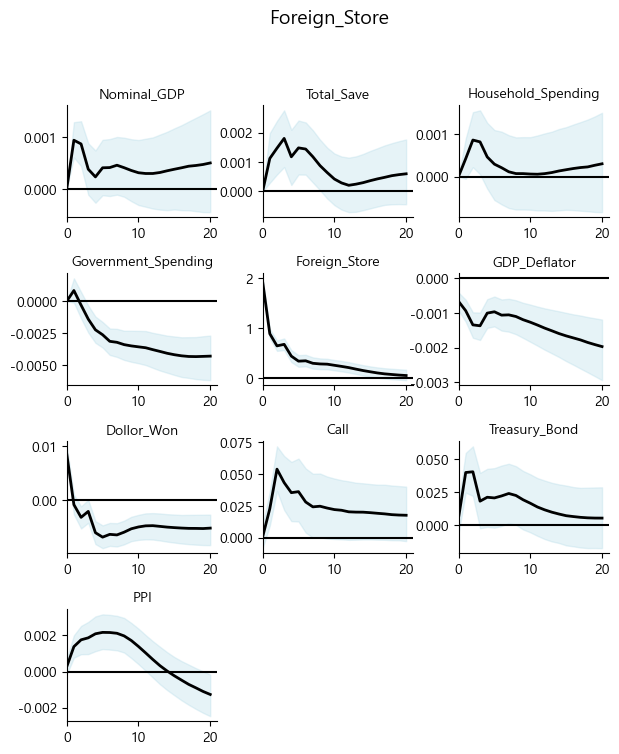

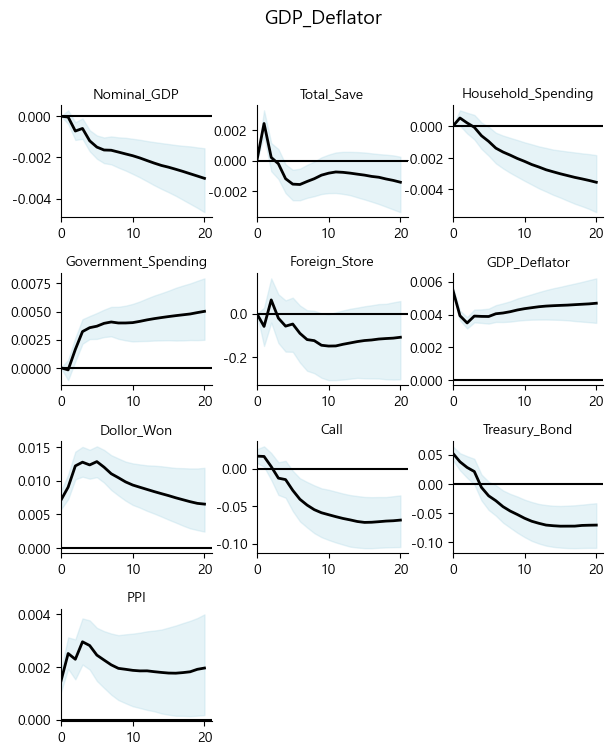

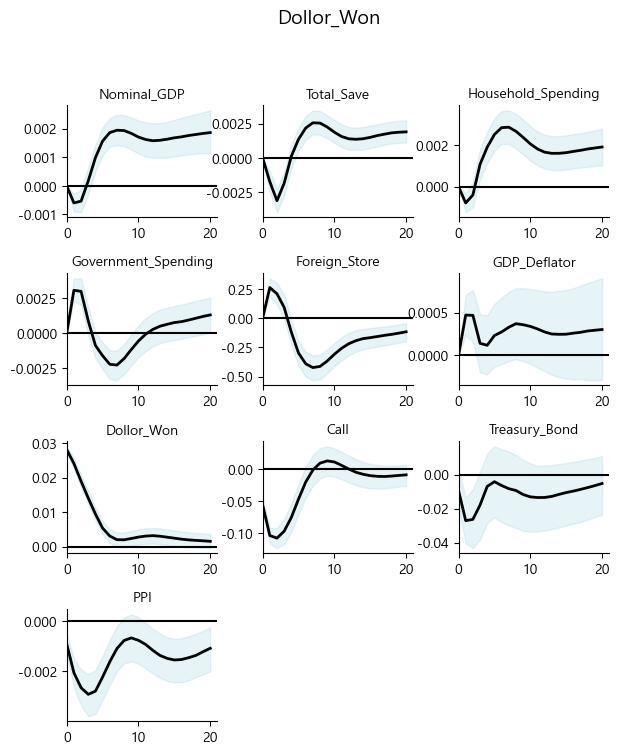

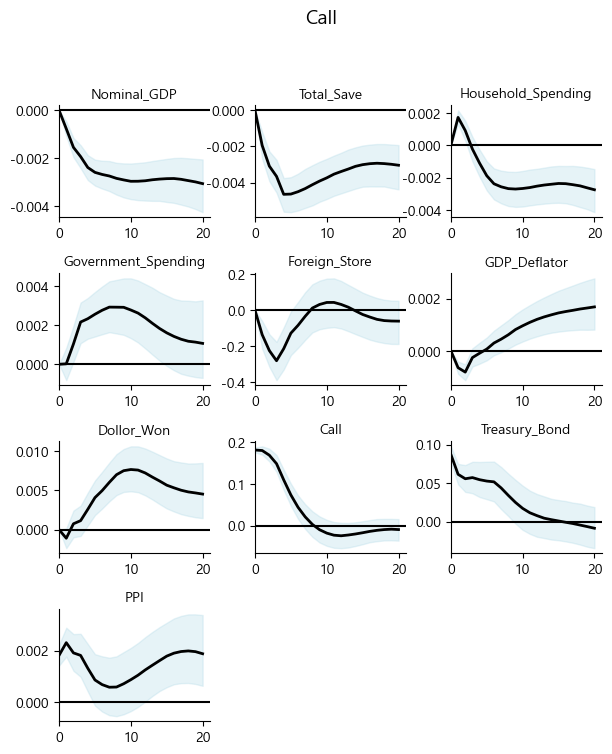

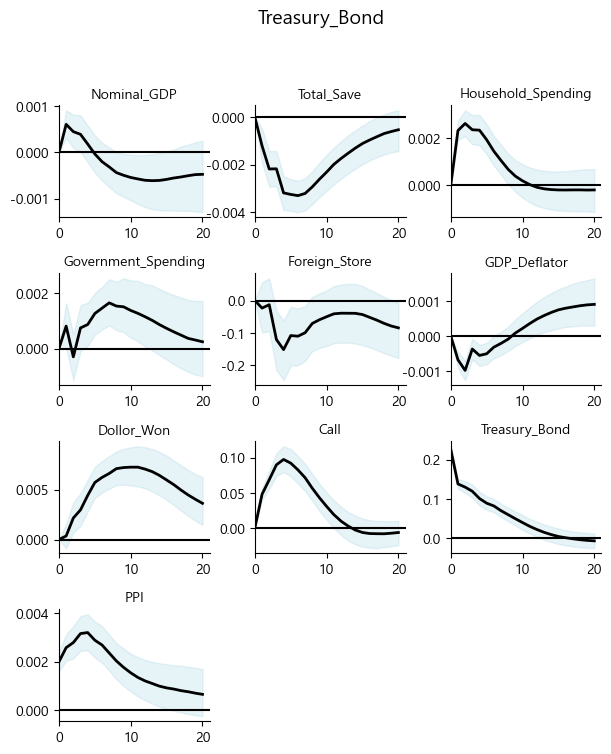

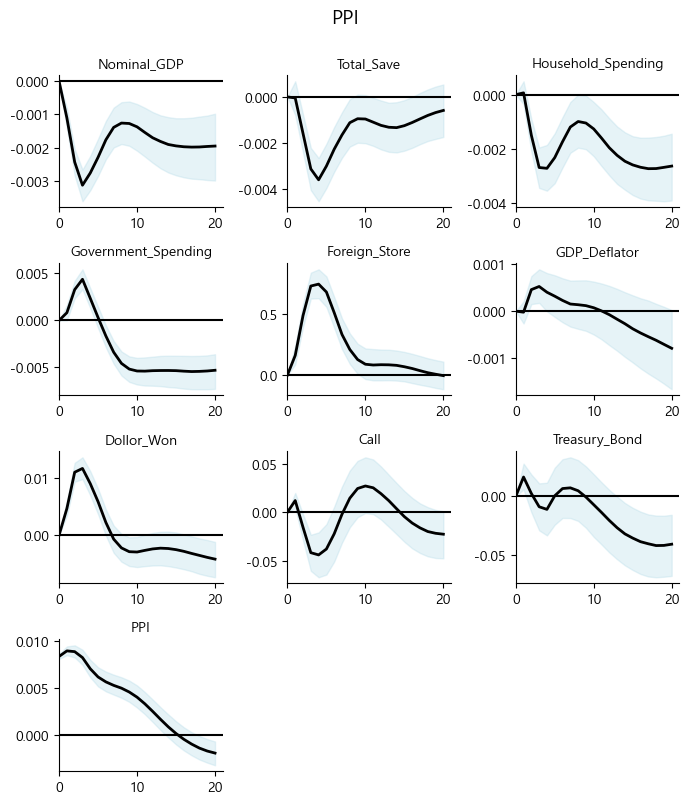

In [10]:
model.plot_irf_impulse_response(df.columns)

`plot_irf_FEVD()` 메서드를 통해 예측오차 분산분해 결과 시각화 할 수 있다.

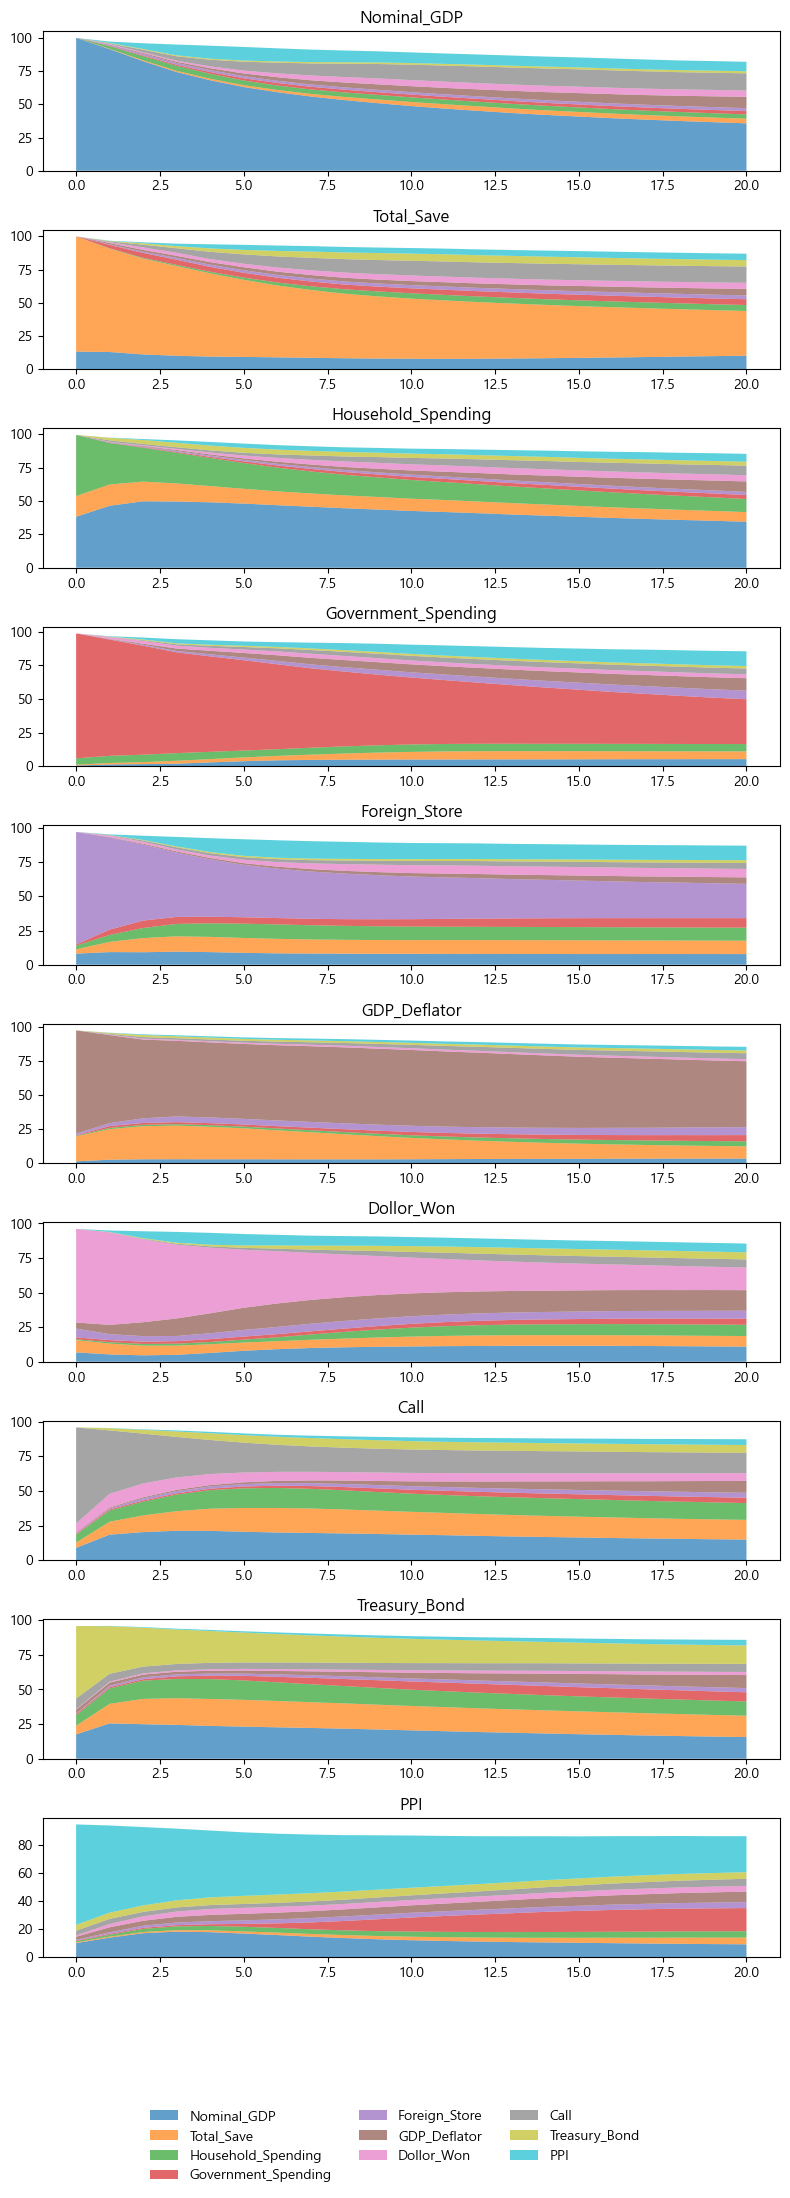

In [11]:
model.plot_irf_FEVD(df.columns)

`plot_irf_historical_decomposion()` 메서드를 사용해 역사적분해 결과도 출력할 수 있다.

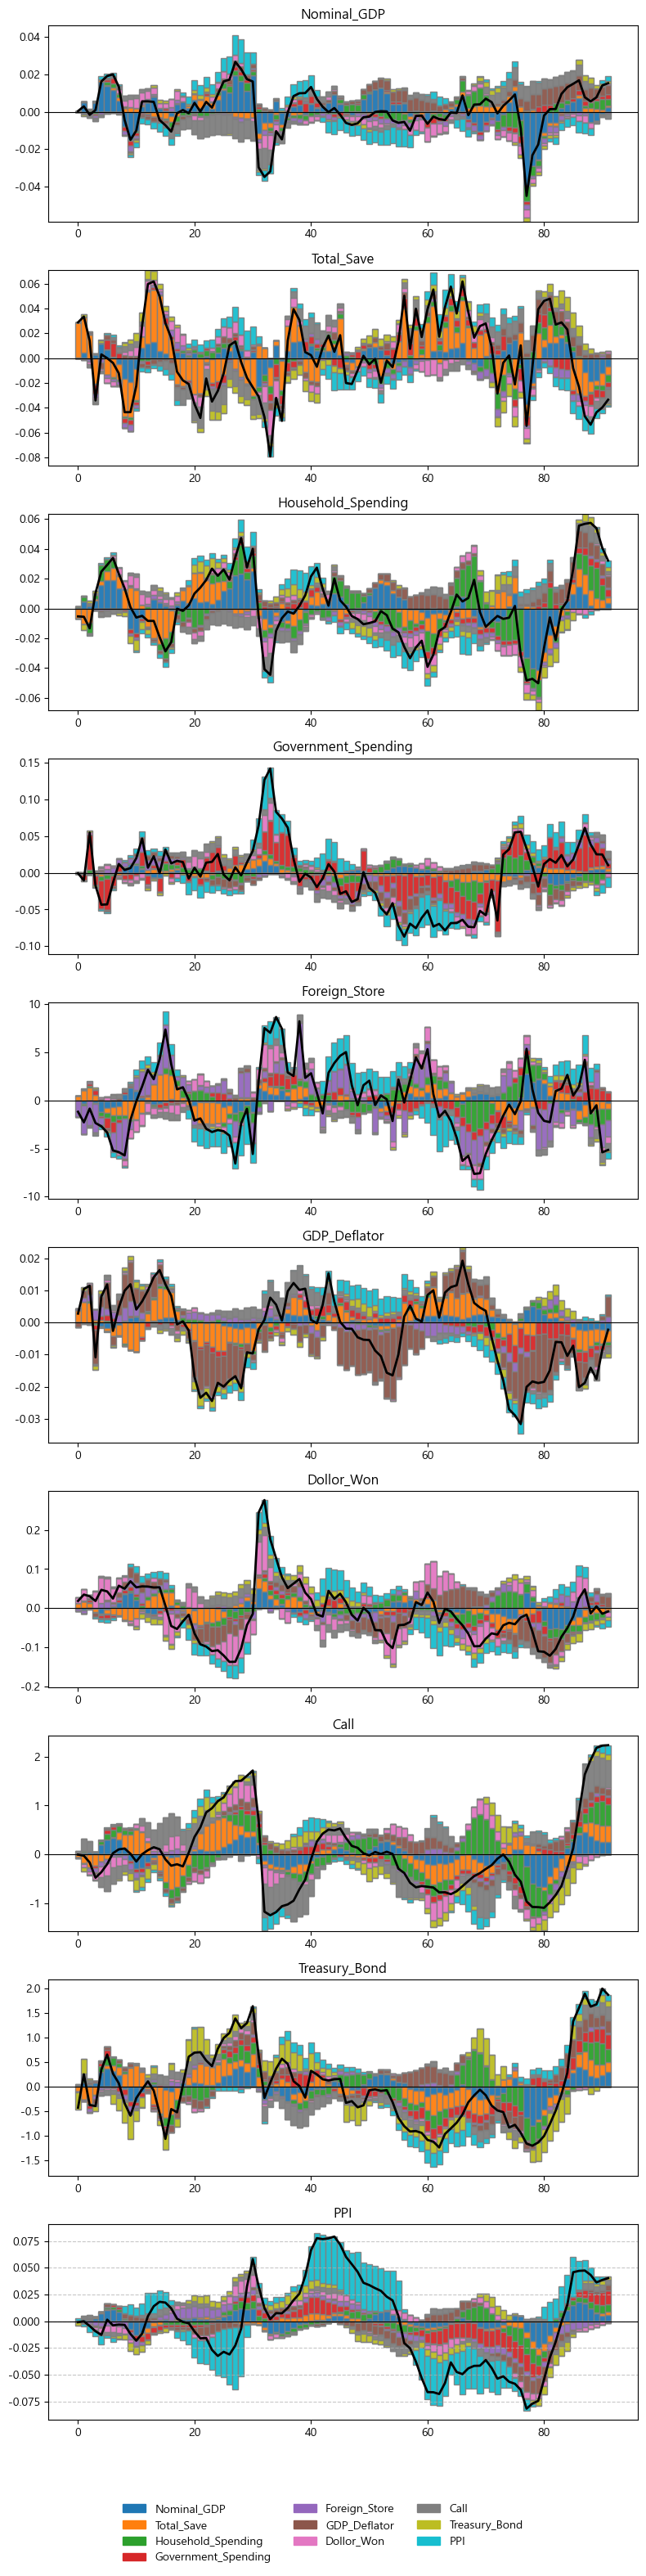

In [12]:
model.plot_irf_historical_decomposition(df.columns)